# **OCR**

**Подготовка данных**

In [1]:
!gdown -q 1tvtmDi-CtRdKLl-A3MUvQM3HyRLm2efC #скачиваем архив

In [2]:
!unzip -q /content/datasets_jpg.zip -d jpg #указываем путь распаковки

In [3]:
!rm datasets_jpg.zip

In [4]:
!pip install -q split-folders pytorch_lightning==2.0.0 efficientnet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 44.0 MB/s eta 0:00:00


Здесь надо перезагрузить Runtime

In [5]:
# библиотеки для работы с изображениями
import cv2
from PIL import Image
import numpy as np
# библиотека для работы с путями
from pathlib import Path
# вспомогательные
import matplotlib.pyplot as plt

# для работы
import torch
import torch.nn as nn
import torch.nn
import torch.nn.functional as F
import splitfolders
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from torchmetrics import Accuracy
from efficientnet_pytorch import EfficientNet


# автоматическое логивароение результатов
from pytorch_lightning.loggers import TensorBoardLogger
# сохранение весов
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
# автоматическое отслеживание lr
from pytorch_lightning.callbacks import LearningRateMonitor
# ранние остановки
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# дополнительные импорты
from tqdm.autonotebook import tqdm
from sklearn.metrics import classification_report
import warnings

SEED = 42
pl.seed_everything(SEED)
plt.style.use('dark_background')
warnings.filterwarnings("ignore")

INFO:lightning_fabric.utilities.seed:Global seed set to 42


In [6]:
#rootdir = "/content/datasets/datasets/405"
#regex_find = re.compile('(.*csv$)|(.*jpg$)') #компилирует шаблон регулярного выражения pattern в объект регулярного выражения,
#jpg_list = []                                #который может быть использован для поиска совпадений с использованием методов
#csv_list = []                                #Match.match(), Match.search() и других способов.

#for root, dirs, files in os.walk(rootdir):  #генерация имен файлов в дереве каталогов, обходя дерево сверху вниз или снизу вверх.
    #for file in files:
        #if regex_find.match(file):
            #temp = os.path.splitext(file)
            #if temp[1] == '.jpg':
                #name = temp[0] + temp[1]
                #clean_name = temp[0].strip() + temp[1]
                #if name != clean_name:
                    #os.rename(rootdir+'/'+name, rootdir+'/'+clean_name) # убираем лишние пробелы в названиях фото
                #jpg_list.append(temp[0])
            #else: csv_list.append(temp[0])

#for x in jpg_list:
    #if x not in csv_list:
        #print(f'Отсутствует csv для {x}.jpg')

#for x in csv_list:
    #if x not in jpg_list:
        #print(f'Отсутствует jpg для {x}.csv')

#pairs_list = list(set(jpg_list) & set(csv_list))

#figure = plt.figure(figsize=(8,8))
#img = Image.open('/content/datasets/datasets/405/141899.jpg')
#plt.imshow(img);

In [7]:
DATASET = Path("/content/jpg/datasets_jpg")

In [8]:
# пробегаем по директории с картинками и добавляем в список
images = [p.resolve() for p in DATASET.glob("**/*") if p.suffix in {".png", ".jpg", ".jpeg"}]

In [9]:
sample_idx = np.random.randint(len(images))

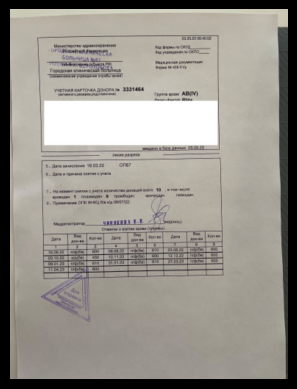

In [17]:
img = Image.open(images[sample_idx]) # RGB!
plt.imshow(img)
plt.axis("off") #отключаем сетку
plt.show()

In [21]:
#img = cv2.imread(str(images[sample_idx])) # BGR!
#plt.imshow(img[...,::-1]) # BGR -> RGB
#plt.axis("off")
#plt.show()

In [12]:
#transforms = torch.nn.Sequential(
    #transforms.ColorJitter([brightness, contrast, ...]),      #произвольное изменение яркости, контрастности, насыщенности и оттенка изображения
    #transforms.Grayscale([num_output_channels]),              #преобразует изображение в оттенки серого
    #transforms.GaussianBlur(kernel_size[, sigma]),            #размывает изображение с помощью случайно выбранного размытия по Гауссу
    #transforms.RandomAdjustSharpness(sharpness_factor[, p]),  #регулирует резкость изображения случайным образом с заданной вероятностью
#)
#scripted_transforms = torch.jit.script(transforms)

In [31]:
#def my_segmentation_transforms(image, segmentation):
    #if random.random() > 0.5:
        #angle = random.randint(-30, 30)
        #image = TF.rotate(image, angle)
        #segmentation = TF.rotate(segmentation, angle)
    # more transforms ...
    #return image, segmentation

**Functional Transforms**

https://pytorch.org/vision/stable/transforms.html#functional-transforms

In [ ]:
import torchvision.transforms.functional as TF
import random

In [40]:
segmentation_brightness = TF.adjust_brightness(img, 2)   #регуляция яркости изображения (0, 1, 2)
segmentation__contrast = TF.adjust_contrast(img, 2)      #регуляция контрастности изображения (0, 1, 2)
segmentation__autocontrast = TF.autocontrast(img)        #автоконтраст

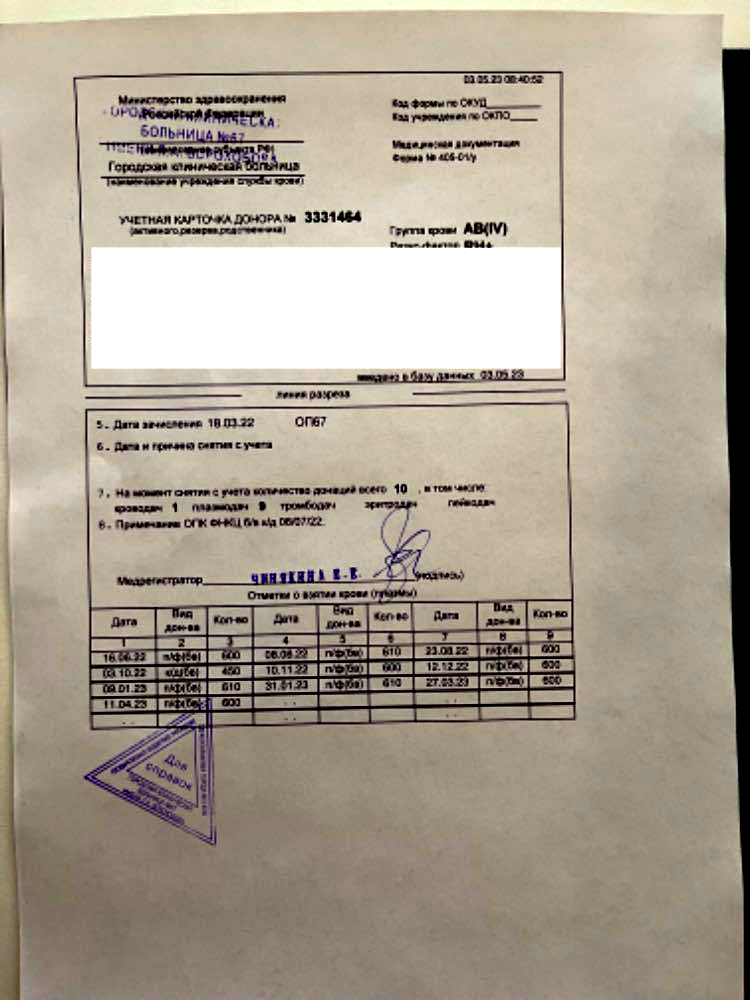

In [39]:
segmentation__contrast